In [1]:
!wget "https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0"

--2023-09-12 13:35:00--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/nilt43hyl1dx82k/dataset.zip [following]
--2023-09-12 13:35:01--  https://www.dropbox.com/s/raw/nilt43hyl1dx82k/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4ba2786a277e2de6b153535094.dl.dropboxusercontent.com/cd/0/inline/CDnRxg1wsMRyPTVnKrQCD-yi1nMOS22iDgm_8p6SxeivLM064UQqXLP8OQjNXk8syAF6vl92tui5rzlVB2YjkHDp2ejo0UhfJRtDSkXiJq6d0voH1sTk3yeQSydILujYO6TQX4Iu6truRUpZ3EPObSg0/file# [following]
--2023-09-12 13:35:11--  https://uc4ba2786a277e2de6b153535094.dl.dropboxusercontent.com/cd/0/inline/CDnRxg1wsMRyPTVnKrQCD-yi1nMOS22iDgm_8p6SxeivLM064UQqXLP8OQjNXk8syAF6vl92tui5rzlVB2YjkHDp2ejo0UhfJRt

In [2]:
!unzip -y "dataset.zip?dl=0"

UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files as text
  -U  use escapes for all non-ASCII Unicode  -UU ignore any Unicode fields
  -C  mat

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from tensorflow.keras.utils import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator# , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy

#  Building our Model To train the data

In [4]:
# Working with pre trained model

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 [==============================] - 0s 0us/step


In [5]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [6]:
import os
print(os.system("pwd"))

0


In [ ]:
!unzip -y "/content/train-20230912T133717Z-001.zip"

In [ ]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/Users/tron/Desktop/Emotion-detection/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

FileNotFoundError: ignored

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/Users/tron/Desktop/Emotion-detection/test",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

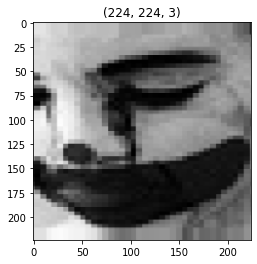

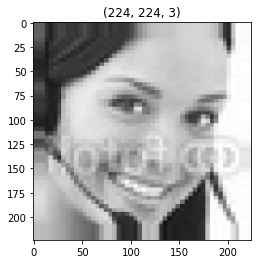

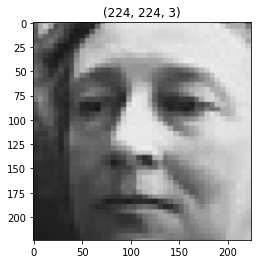

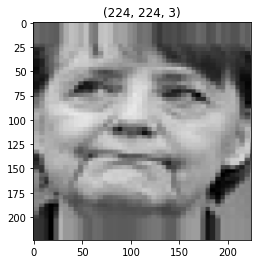

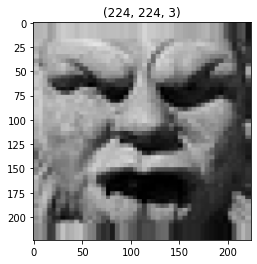

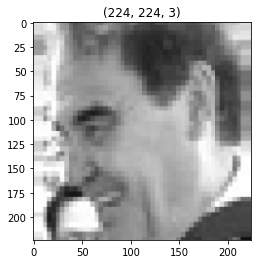

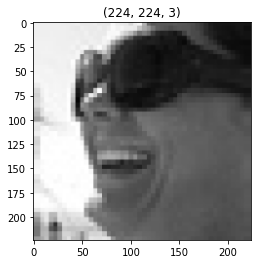

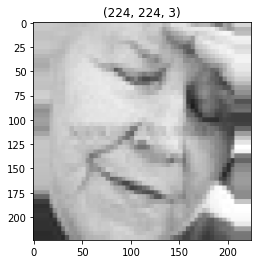

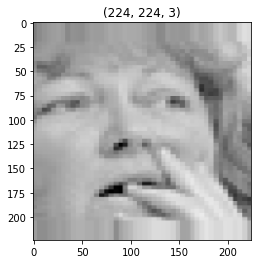

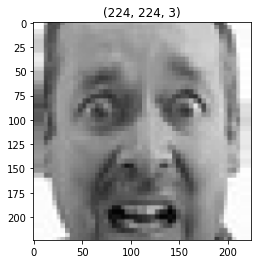

In [ ]:
# to visualize the images in the traing data denerator

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images
def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images
plotImages(t_img, label)

# having early stopping and model check point

In [ ]:
## having early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list
call_back = [es, mc]

In [ ]:
hist = model.fit_generator(train_data,
                           steps_per_epoch= 10,
                           epochs= 30,
                           validation_data= val_data,
                           validation_steps= 8,
                           callbacks=[es,mc])

/var/folders/hk/1r8c46ws2dj61mhg1t_zm0vc0000gn/T/ipykernel_87036/564963302.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 19.5889 - accuracy: 0.1813
Epoch 1: val_accuracy improved from -inf to 0.28516, saving model to best_model.h5
10/10 [==============================] - 23s 2s/step - loss: 19.5889 - accuracy: 0.1813 - val_loss: 20.0392 - val_accuracy: 0.2852
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 14.3458 - accuracy: 0.3000
Epoch 2: val_accuracy did not improve from 0.28516
10/10 [==============================] - 20s 2s/step - loss: 14.3458 - accuracy: 0.3000 - val_loss: 12.9778 - val_accuracy: 0.2852
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 9.4358 - accuracy: 0.3313
Epoch 3: val_accuracy improved from 0.28516 to 0.37109, saving model to best_model.h5
10/10 [==============================] - 19s 2s/step - loss: 9.4358 - accuracy: 0.3313 - val_loss: 7.7793 - val_accuracy: 0.3711
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 5.6651 - accuracy: 0.3781
Epoch 4: va

In [ ]:

# Loading the best fit model
from keras.models import load_model
model = load_model("/Users/tron/Desktop/Emotion-detection/best_model.h5")

In [ ]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

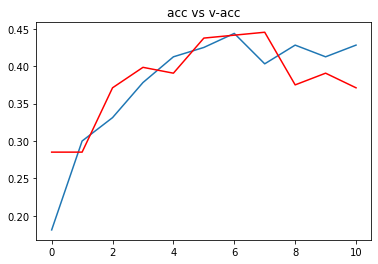

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

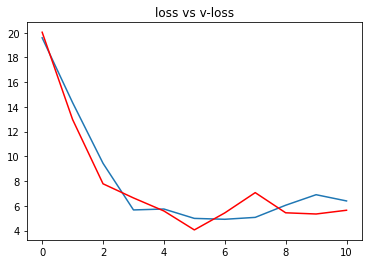

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# just to map o/p values
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 1s 570ms/step
 the image is of sad


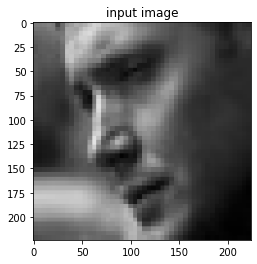

In [ ]:
# path for the image to see if it predics correct class

path = "/Users/tron/Desktop/Emotion-detection/test/angry/PrivateTest_1054527.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()